## Examples and tests PE



# alternative inserts 
import networkx as nx

In [ ]:
import rl_parkingplacefinder
from rl_parkingplacefinder import *
import matplotlib.pyplot as plt
from rl_parkingplacefinder import Parking_lot
from rl_parkingplacefinder.Parking_lot import Parking_Lot

In [1]:
from rl_parkingplacefinder import Parking_lot
from rl_parkingplacefinder.Parking_lot import Parking_Lot

In [2]:
ffp = Parking_lot.Filling_Function_Parameters(uniform_distribution_p_value = 0.5)

In [3]:
ldp = Parking_lot.Lane_Direction_Parameters()

['number_of_lanes=7']
['number_of_slots=49']


/Users/pascal/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


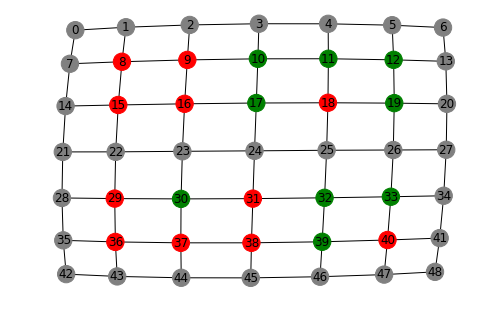

In [4]:
parking_lot = Parking_Lot(lane_direction_paramenters=ldp, 
                         filling_function_parameters=ffp, 
                         nr_parking_slots_per_lane=5,
                         nr_parking_lanes=4, 
                         parking_lane_depth=2, 
                         debug=True,
                         draw_graph = True,
                         show_summary = False
                        )

In [5]:
env = parking_lot.get_env()

In [6]:
type(env)

networkx.classes.graph.Graph

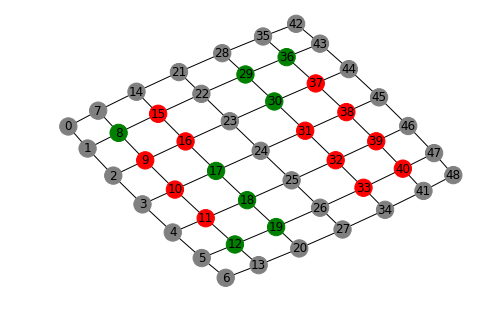

In [9]:
parking_lot.plot()

In [ ]:
found_slot = -1
agent = Park_Finder_Agent()
found_slot = agent.find_parking(parking_lot)
parking_lot.plot()

To create the agent I added a new dictionary object with key "ocuppation" and possible values "vacant" and "taken" to each "park" node. 

In [10]:
parking_lot.export_to_pickle()

In [ ]:
# Example for node found_slot, an occupied parking spot
parking_lot.g.nodes[found_slot]

In [ ]:
from rl_parkingplacefinder import Park_Finder_Agent
import numpy as np
import collections
import matplotlib.pylab as plt
import networkx as nx
from PIL import Image
import cv2
import scipy.misc
import os

In [ ]:
def print_frames(frames):
    for i, frame in enumerate(frames):
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Resulting state: {frame['resulting state']}")
        print(f"previous state(s): {frame['state history']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Found parking: {frame['new start']}")
        print(f"Walking distance: {frame['walk distance']}")
        print(f"Driving distance: {frame['drive distance']}")
        print('-------------')
        

    
def maxAction(Q, state, actions):
    values = np.array([Q[state,a] for a in actions])
    # if all the values are 0 in the Q table, pick random an action (otherwise it would always chose the first one)
    if sum(values)==0:
        print("picking random")
        action = np.random.randint(0,4)
    else:
        # if there is already something learned, pick the one which has the highest reward attached to it
        action = np.argmax(values)
    return actions[action]

In [ ]:
PARK_CRASH_REWARD = -200
WALL_CRASH_REWARD = -200
TIME_REWARD = -0.001
BACKWARD_REWARD = -40
STUCK_REWARD = -30
PARKING_REWARD = 0.1
EPISODES = 80000
show = True

In [ ]:
from dqn_keras import Agent
from rl_parkingplacefinder import Park_Finder_Agent
from utils import plotLearning
import numpy as np


if __name__ == '__main__':
    env = Park_Finder_Agent()
    n_episodes = 500
    agent = Agent(gamma=0.99, epsilon=1.0, alpha=0.0005, input_dims=12,
                  n_actions = 4, mem_size=1000000, batch_size=64, epsilon_end=0.1)

    #agent.load_model()
    scores = []
    eps_history = []

    for i in range(n_episodes):
        done = False
        score = 0
        observation = env.reset()
        # observation = np.array(env.stateSpace)
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.remember(observation, action, reward, observation_, done)
            observation = observation_
            agent.learn()

        eps_history.append(agent.epsilon)
        scores.append(score)

        avg_score = np.mean(scores[max(0, i-100):(i+1)])
        print('episode ', i, 'score %.2f' %score, 'average score %.2f' % avg_score)

        if i % 10 == 0 and i > 0:
            agent.save_model()

    filename = 'dqn.png'
    x = [i+1 for i in range(n_episodes)]
    plotLearning(x, scores, eps_history, filename)